In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Housing.csv")
df.head()

price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished

In [3]:
df["mainroad"] = df["mainroad"].map({"yes":1, "no": 0})
df["guestroom"] = df["guestroom"].map({"yes":1, "no": 0})
df["basement"] = df["basement"].map({"yes":1, "no": 0})
df["hotwaterheating"] = df["hotwaterheating"].map({"yes":1, "no": 0})
df["airconditioning"] = df["airconditioning"].map({"yes":1, "no": 0})
df["prefarea"] = df["prefarea"].map({"yes":1, "no": 0})

In [4]:
status = pd.get_dummies(df["furnishingstatus"], drop_first=True)
df = pd.concat([df, status], axis = 1)
df.drop(["furnishingstatus"], axis = 1, inplace = True)
df.head()

price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0  13300000  7420         4          2        3         1          0   
1  12250000  8960         4          4        4         1          0   
2  12250000  9960         3          2        2         1          0   
3  12215000  7500         4          2        2         1          0   
4  11410000  7420         4          1        2         1          1   

   basement  hotwaterheating  airconditioning  parking  prefarea  \
0         0                0                1        2         1   
1         0                0                1        3         0   
2         1                0                0        2         1   
3         1                0                1        3         1   
4         1                0                1        2         0   

   semi-furnished  unfurnished  
0               0            0  
1               0            0  
2               1            0  
3               0            0  
4               0            0

In [5]:
len(df)

545

In [6]:
data = df.loc[:, ["area", "price"]]
data.head()

area     price
0  7420  13300000
1  8960  12250000
2  9960  12250000
3  7500  12215000
4  7420  11410000

In [7]:
col = data.columns
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

data = pd.DataFrame(data)
data.columns = col

data.head()

area     price
0  0.396564  1.000000
1  0.502405  0.909091
2  0.571134  0.909091
3  0.402062  0.906061
4  0.396564  0.836364

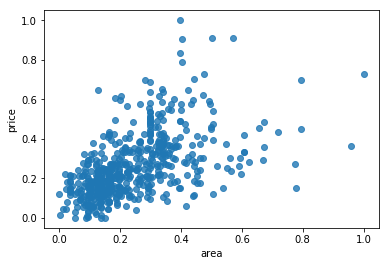

In [8]:
sns.regplot(x="area", y="price", data=data, fit_reg=False)

In [9]:
train, test = train_test_split(data, test_size=0.3, random_state=10)
len(train)

381

In [10]:
Xtrain = train["area"]
Xtrain = Xtrain.values.reshape(-1, 1)
ytrain = train["price"]

Xtest = test["area"]
Xtest = Xtest.values.reshape(-1, 1)
ytest = test["price"]

In [12]:
degrees = [1, 2, 3, 6, 10, 20]
ytrain_pred = np.zeros((len(Xtrain), len(degrees)))
ytest_pred = np.zeros((len(Xtest), len(degrees)))

for i, degree in enumerate(degrees):
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(Xtrain, ytrain)
    
    ytrain_pred[:, i] = model.predict(Xtrain)
    ytest_pred[:, i] = model.predict(Xtest)

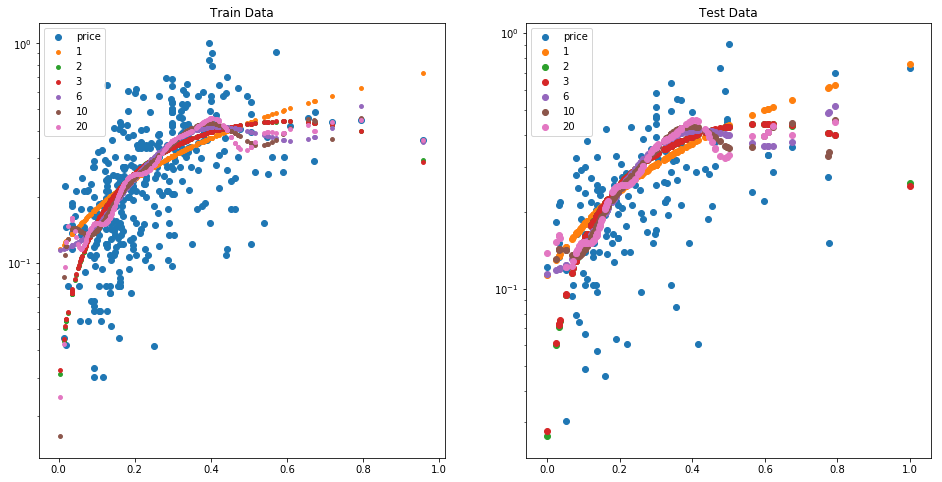

In [13]:
plt.figure(figsize=(16, 8))

plt.subplot(121)
plt.scatter(Xtrain, ytrain)
plt.yscale("log")
plt.title("Train Data")

for i, degree in enumerate(degrees):
    plt.scatter(Xtrain, ytrain_pred[:, i], s= 15, label= str(degree))
    plt.legend(loc= "upper left")
    
plt.subplot(122)
plt.scatter(Xtest, ytest)
plt.yscale("log")
plt.title("Test Data")
for i, degree in enumerate(degrees):
    plt.scatter(Xtest, ytest_pred[:, i], label= str(degree))
    plt.legend(loc= "upper left")

In [14]:
print("R-Squared Values:\n")
for i, degree in enumerate(degrees):
    train_r2 = round(sklearn.metrics.r2_score(ytrain, ytrain_pred[:, i]), 2)
    test_r2 = round(sklearn.metrics.r2_score(ytest, ytest_pred[:, i]), 2)
    print("Polynomial degree {0}: train score={1}, test score= {2}".format(degree, train_r2, test_r2))

R-Squared Values:

Polynomial degree 1: train score=0.29, test score= 0.25
Polynomial degree 2: train score=0.34, test score= 0.22
Polynomial degree 3: train score=0.34, test score= 0.22
Polynomial degree 6: train score=0.36, test score= 0.11
Polynomial degree 10: train score=0.37, test score= -108.76
Polynomial degree 20: train score=0.38, test score= -307071892461.64


# Cross Validation

In [15]:
#binary_vars_list = ["mainroad", "guestroom", "basement", "hotwaterheating", "airconditioning", ]
#def binary_map(x):
 #   return x.map({"yes":1, "no":0})

#df[binary_vars_list] = df[binary_vars_list].apply(binary_map)

In [16]:
df.head()

price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0  13300000  7420         4          2        3         1          0   
1  12250000  8960         4          4        4         1          0   
2  12250000  9960         3          2        2         1          0   
3  12215000  7500         4          2        2         1          0   
4  11410000  7420         4          1        2         1          1   

   basement  hotwaterheating  airconditioning  parking  prefarea  \
0         0                0                1        2         1   
1         0                0                1        3         0   
2         1                0                0        2         1   
3         1                0                1        3         1   
4         1                0                1        2         0   

   semi-furnished  unfurnished  
0               0            0  
1               0            0  
2               1            0  
3               0            0  
4               0            0

In [20]:
dftrain, dftest = train_test_split(df, test_size= 0.3, random_state= 100)
scaler = MinMaxScaler()
num_vars = ["area", "bedrooms", "bathrooms", "stories", "parking", "price"]
dftrain[num_vars] = scaler.fit_transform(dftrain[num_vars])
dftrain.head()

price      area  bedrooms  bathrooms   stories  mainroad  guestroom  \
359  0.169697  0.155227       0.4        0.0  0.000000         1          0   
19   0.615152  0.403379       0.4        0.5  0.333333         1          0   
159  0.321212  0.115628       0.4        0.5  0.000000         1          1   
35   0.548133  0.454417       0.4        0.5  1.000000         1          0   
28   0.575758  0.538015       0.8        0.5  0.333333         1          0   

     basement  hotwaterheating  airconditioning   parking  prefarea  \
359         0                0                0  0.333333         0   
19          0                0                1  0.333333         1   
159         1                0                1  0.000000         0   
35          0                0                1  0.666667         0   
28          1                1                0  0.666667         0   

     semi-furnished  unfurnished  
359               0            1  
19                1            0  
159               0            0  
35                0            0  
28                0            1

In [21]:
dftest[num_vars] = scaler.fit_transform(dftest[num_vars])
dftest.head()

price      area  bedrooms  bathrooms   stories  mainroad  guestroom  \
265  0.247651  0.084536  0.333333   0.000000  0.333333         1          0   
54   0.530201  0.298969  0.333333   0.333333  0.333333         1          1   
171  0.328859  0.592371  0.333333   0.000000  0.000000         1          0   
244  0.261745  0.252234  0.333333   0.000000  0.333333         1          1   
268  0.245638  0.226804  0.666667   0.000000  0.333333         1          0   

     basement  hotwaterheating  airconditioning   parking  prefarea  \
265         0                0                0  0.000000         1   
54          0                0                1  0.333333         0   
171         0                0                0  0.333333         1   
244         1                0                0  0.000000         1   
268         0                0                1  0.000000         0   

     semi-furnished  unfurnished  
265               1            0  
54                1            0  
171               1            0  
244               1            0  
268               1            0

In [24]:
ytrain = dftrain.pop("price")
Xtrain = dftrain

ytest = dftest.pop("price")
Xtest = dftest

In [29]:
model = LinearRegression()
model.fit(Xtrain, ytrain)
rfe = RFE(model, n_features_to_select= 10)
rfe = rfe.fit(Xtrain, ytrain)

In [30]:
list(zip(Xtrain.columns, rfe.support_, rfe.ranking_))

[('area', True, 1),
 ('bedrooms', True, 1),
 ('bathrooms', True, 1),
 ('stories', True, 1),
 ('mainroad', True, 1),
 ('guestroom', True, 1),
 ('basement', False, 3),
 ('hotwaterheating', True, 1),
 ('airconditioning', True, 1),
 ('parking', True, 1),
 ('prefarea', True, 1),
 ('semi-furnished', False, 4),
 ('unfurnished', False, 2)]

In [31]:
ypred = rfe.predict(Xtest)

In [32]:
r2 = sklearn.metrics.r2_score(ytest, ypred)
r2

0.5812051458999572

In [41]:
model = LinearRegression()
model.fit(Xtrain, ytrain)
rfe = RFE(model, n_features_to_select= 12)
rfe = rfe.fit(Xtrain, ytrain)
list(zip(Xtrain.columns, rfe.support_, rfe.ranking_))
ypred = rfe.predict(Xtest)
r2 = sklearn.metrics.r2_score(ytest, ypred)
r2

0.5997108185115165

In [42]:
lm = LinearRegression()
scores = cross_val_score(lm, Xtrain, ytrain, scoring="r2", cv= 5)
scores

array([0.6829775 , 0.69324306, 0.6762109 , 0.61782891, 0.59266171])

In [46]:
folds = KFold(n_splits=7, shuffle=True, random_state=100)
scores = cross_val_score(lm, Xtrain, ytrain, scoring="r2", cv= folds)
scores

array([0.67326158, 0.55048535, 0.68714154, 0.57956322, 0.72246821,
       0.68821283, 0.49226397])

In [47]:
scores = cross_val_score(lm, Xtrain, ytrain, scoring="neg_mean_squared_error", cv= 5)
scores

array([-0.00806336, -0.00658776, -0.0064797 , -0.0070743 , -0.01523682])

In [48]:
folds = KFold(n_splits=7, shuffle=False, random_state=100)
scores = cross_val_score(lm, Xtrain, ytrain, scoring="r2", cv= folds)
scores

array([0.73521432, 0.59788053, 0.70013332, 0.65860632, 0.61277587,
       0.65629018, 0.58547403])

In [49]:
folds = KFold(n_splits=5, shuffle=True, random_state=100)
hyper_params = [{"n_features_to_select": list(range(1, 14))}]
lm = LinearRegression()
lm.fit(Xtrain, ytrain)
rfe = RFE(lm)

model_cv = GridSearchCV(estimator=rfe, param_grid=hyper_params, scoring="r2", cv= folds, verbose=1, return_train_score=True)
model_cv.fit(Xtrain, ytrain)

Fitting 5 folds for each of 13 candidates, totalling 65 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  65 out of  65 | elapsed:    0.5s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             error_score='raise-deprecating',
             estimator=RFE(estimator=LinearRegression(copy_X=True,
                                                      fit_intercept=True,
                                                      n_jobs=None,
                                                      normalize=False),
                           n_features_to_select=None, step=1, verbose=0),
             iid='warn', n_jobs=None,
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [50]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.011968  1.784407e-03         0.001595    4.885789e-04   
1        0.010577  1.358125e-03         0.001197    3.999235e-04   
2        0.008379  4.896496e-04         0.000996    6.307533e-04   
3        0.008975  1.094149e-03         0.001396    4.885778e-04   
4        0.007979  8.609519e-07         0.001197    3.989221e-04   
5        0.006983  8.939409e-04         0.000796    3.981941e-04   
6        0.005585  4.884998e-04         0.000997    3.504023e-07   
7        0.004993  1.161918e-05         0.000991    1.207010e-05   
8        0.005785  7.464039e-04         0.000997    2.780415e-07   
9        0.005385  4.886751e-04         0.001396    4.885193e-04   
10       0.003990  2.780415e-07         0.000997    4.523674e-07   
11       0.003594  7.991633e-04         0.001194    3.970757e-04   
12       0.002593  4.884806e-04         0.001796    3.990421e-04   

   param_n_features_to_select                        params  \
0                           1   {'n_features_to_select': 1}   
1                           2   {'n_features_to_select': 2}   
2                           3   {'n_features_to_select': 3}   
3                           4   {'n_features_to_select': 4}   
4                           5   {'n_features_to_select': 5}   
5                           6   {'n_features_to_select': 6}   
6                           7   {'n_features_to_select': 7}   
7                           8   {'n_features_to_select': 8}   
8                           9   {'n_features_to_select': 9}   
9                          10  {'n_features_to_select': 10}   
10                         11  {'n_features_to_select': 11}   
11                         12  {'n_features_to_select': 12}   
12                         13  {'n_features_to_select': 13}   

    split0_test_score  split1_test_score  split2_test_score  \
0            0.172606           0.351721           0.206887   
1            0.335665           0.428751           0.439969   
2            0.421848           0.539257           0.491515   
3            0.449487           0.567101           0.494461   
4            0.494779           0.610200           0.492807   
5            0.512477           0.628849           0.488411   
6            0.568887           0.664093           0.552385   
7            0.570639           0.665608           0.592323   
8            0.578843           0.694189           0.606220   
9            0.574376           0.693197           0.601972   
10           0.578083           0.707264           0.608905   
11           0.602951           0.713417           0.613593   
12           0.599306           0.713076           0.613257   

    split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0            0.165910  ...         0.243471        0.077611               13   
1            0.505321  ...         0.438090        0.058533               12   
2            0.604426  ...         0.516555        0.060021               11   
3            0.600237  ...         0.526070        0.053150               10   
4            0.590812  ...         0.541765        0.049251                8   
5            0.527379  ...         0.540988        0.047988                9   
6            0.534634  ...         0.577613        0.044949                7   
7            0.550001  ...         0.591740        0.039391                6   
8            0.590777  ...         0.615256        0.040756                4   
9            0.594335  ...         0.608457        0.043476                5   
10           0.621282  ...         0.624741        0.043607                3   
11           0.631241  ...         0.636690        0.039443                1   
12           0.627391  ...         0.634771        0.040209                2   

    split0_train_score  split1_train_score  split2_train_score  \
0             0.302971            0.265961            0.280611   
1             0.505799          

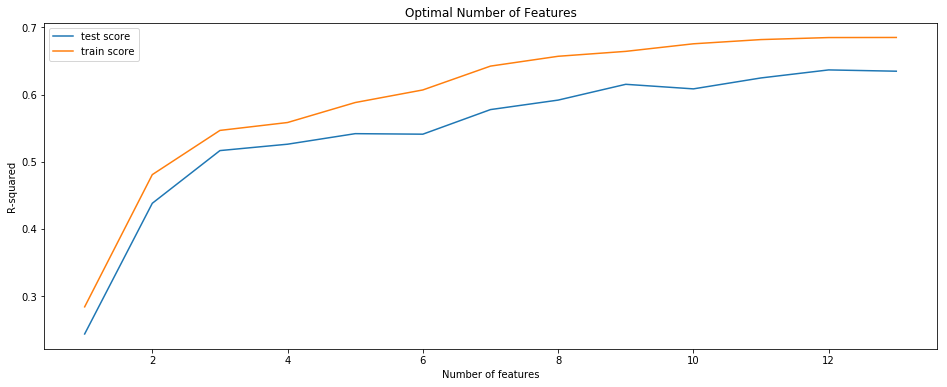

In [51]:
plt.figure(figsize=(16, 6))
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel("Number of features")
plt.ylabel("R-squared")
plt.title("Optimal Number of Features")
plt.legend(["test score", "train score"], loc= "upper left")

In [52]:
n_features_optimal = 10
lm = LinearRegression()
lm.fit(Xtrain, ytrain)

rfe = RFE(lm, n_features_to_select=n_features_optimal)
rfe = rfe.fit(Xtrain, ytrain)

ypred = lm.predict(Xtest)
r2 = sklearn.metrics.r2_score(ytest, ypred)
r2

0.5995575338728532